In [2]:
%load_ext autoreload
%autoreload 2

import train

In [3]:
bert, loss_vals, accs = train.main(data_config={'batch_size': 32, 'n_epochs': 1, 'batches_per_epoch': None})

100%|██████████| 84.1M/84.1M [05:39<00:00, 248kB/s] 


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

100%|██████████| 782/782 [01:35<00:00,  8.17it/s]
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 782/782 [06:58<00:00,  1.87it/s, acc=0.869, loss=0.331, gpu usage=27.6 GiB]


In [ ]:
import matplotlib.pyplot as plt
plt.plot([loss_tensor.cpu().detach().numpy() for loss_tensor in loss_vals])

In [6]:
accs

[0.75,
 0.34375,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.9375,
 0.34375,
 1.0,
 0.5,
 0.53125,
 0.625,
 0.21875,
 0.21875,
 0.8125,
 0.625,
 0.8125,
 0.0,
 0.84375,
 0.5,
 0.6875,
 0.21875,
 0.84375,
 0.25,
 0.625,
 0.78125,
 0.625,
 0.75,
 0.375,
 0.53125,
 0.4375,
 0.53125,
 0.9375,
 0.125,
 0.40625,
 0.46875,
 0.59375,
 0.0,
 0.21875,
 0.375,
 0.15625,
 0.625,
 0.78125,
 0.71875,
 0.90625,
 0.9375,
 0.71875,
 1.0,
 0.6875,
 0.75,
 0.59375,
 0.90625,
 0.96875,
 0.78125,
 0.625,
 1.0,
 1.0,
 1.0,
 0.875,
 0.96875,
 0.8125,
 0.90625,
 0.6451612710952759,
 0.96875,
 0.9375,
 0.9375,
 0.78125,
 1.0,
 0.96875,
 0.96875,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.9375,
 0.84375,
 0.78125,
 0.9375]

In [ ]:
plt.plot([loss_tensor.cpu().detach().numpy() for loss_tensor in loss_vals + loss_vals_2])

In [ ]:
train.save(bert)

In [ ]:
%load_ext autoreload
%autoreload 2

import train

In [ ]:
bert, loss_vals, accs = train.main(data_config={'batch_size': 32, 'n_epochs': 1, 'batches_per_epoch': None})

100%|██████████| 84.1M/84.1M [05:39<00:00, 248kB/s] 


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

100%|██████████| 782/782 [01:35<00:00,  8.17it/s]
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 782/782 [06:58<00:00,  1.87it/s, acc=0.869, loss=0.331, gpu usage=27.6 GiB]


[autoreload of train failed: Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueError: main() requires a code object with 0 free vars, not 7
]


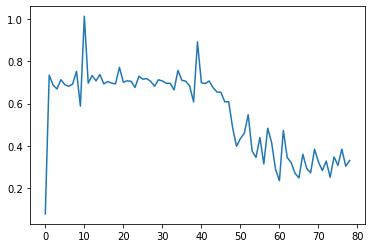

In [ ]:
import matplotlib.pyplot as plt
plt.plot([loss_tensor.cpu().detach().numpy() for loss_tensor in loss_vals])

In [ ]:
accs

[0.75,
 0.34375,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.9375,
 0.34375,
 1.0,
 0.5,
 0.53125,
 0.625,
 0.21875,
 0.21875,
 0.8125,
 0.625,
 0.8125,
 0.0,
 0.84375,
 0.5,
 0.6875,
 0.21875,
 0.84375,
 0.25,
 0.625,
 0.78125,
 0.625,
 0.75,
 0.375,
 0.53125,
 0.4375,
 0.53125,
 0.9375,
 0.125,
 0.40625,
 0.46875,
 0.59375,
 0.0,
 0.21875,
 0.375,
 0.15625,
 0.625,
 0.78125,
 0.71875,
 0.90625,
 0.9375,
 0.71875,
 1.0,
 0.6875,
 0.75,
 0.59375,
 0.90625,
 0.96875,
 0.78125,
 0.625,
 1.0,
 1.0,
 1.0,
 0.875,
 0.96875,
 0.8125,
 0.90625,
 0.6451612710952759,
 0.96875,
 0.9375,
 0.9375,
 0.78125,
 1.0,
 0.96875,
 0.96875,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.9375,
 0.84375,
 0.78125,
 0.9375]

In [ ]:
plt.plot([loss_tensor.cpu().detach().numpy() for loss_tensor in loss_vals + loss_vals_2])

In [ ]:
train.save(bert)